# Machine Learning Exercise

Name: MUTESASIRA EDWARD     

RegNo: 2023/HD07/3369U

In [1]:
# import necessary libraries
import pandas as pd # this is for dataframe maniplation
import numpy as np # this is for numerical / mathmatical compputing
import matplotlib.pyplot as plt # this is for visualization

# remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data: diabetes dataset provided in the repo
data = pd.read_csv('diabetes.csv')
data.head(5) # show the first 5 rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#check the dimensions of the data, and explain why this step is important

#Check dimentions of diabetes.csv data
data.shape

(768, 9)

#### Explanation of why checking the dimensions of data is important
ITs because of the following reseons

1. `Data Integrity:` This ensures that the data is complete and accurate. 
    The shape of the data gives an idea of how much data is available for analysis. 
    It helps in detecting any inconsistencies or missing values in the data.

2. `Data Preprocessing:` The dimensions of data determine the appropriate preprocessing steps 
    to apply before building a machine learning model. Steps like data cleaning.

3. `Model Training:` Since machine learning models require a certain amount of data to learn 
    and generalize patterns in the data, checking the dimensions impacts this stage.
    If the dataset is too small, the model may not learn the underlying patterns in the data, 
    and if the dataset is too large, it may lead to overfitting. 
    
4. `Training time estimation:` The dimensions of data have a significant impact 
    on the training times of machine learning models. 
    As the size of the dataset increases, the training time of machine learning models also increases.

In [4]:
# transform the dataset by filling in values that are min = 0 but are not accurate e.g Insulin min=0
# chose the best way you think to replace those values, whether with the mean value e.t.c

# create a copy of the original dataset with a new name
cleaned_data = data.copy()

# replace the 0 values with the mean of non-zero values in the Glucose column
mean_g = cleaned_data[cleaned_data["Glucose"] != 0]["Glucose"].mean()
cleaned_data["Glucose"] = cleaned_data["Glucose"].replace(0, mean_g)

# replace the 0 values with the mean of non-zero values in the BloodPressure column
mean_bp = cleaned_data[cleaned_data["BloodPressure"] != 0]["BloodPressure"].mean()
cleaned_data["BloodPressure"] = cleaned_data["BloodPressure"].replace(0, mean_bp)

# replace the 0 values with the mean of non-zero values in the Insulin column
mean_i = cleaned_data[cleaned_data["Insulin"] != 0]["Insulin"].mean()
cleaned_data["Insulin"] = cleaned_data["Insulin"].replace(0, mean_i)

# replace the 0 values with the mean of non-zero values in the BMI column
mean_bmi = cleaned_data[cleaned_data["BMI"] != 0]["BMI"].mean()
cleaned_data["BMI"] = cleaned_data["BMI"].replace(0, mean_bmi)

# replace the 0 values with the mean of non-zero values in the SkinThickness column
mean_st = cleaned_data[cleaned_data["SkinThickness"] != 0]["SkinThickness"].mean()
cleaned_data["SkinThickness"] = cleaned_data["SkinThickness"].replace(0, mean_st)

# clean the data by removing any duplicates and handling missing values
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.dropna(inplace=True)

# printing the first 5 rows
cleaned_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [6]:
#install missingno

# %pip install missingno

<Axes: >

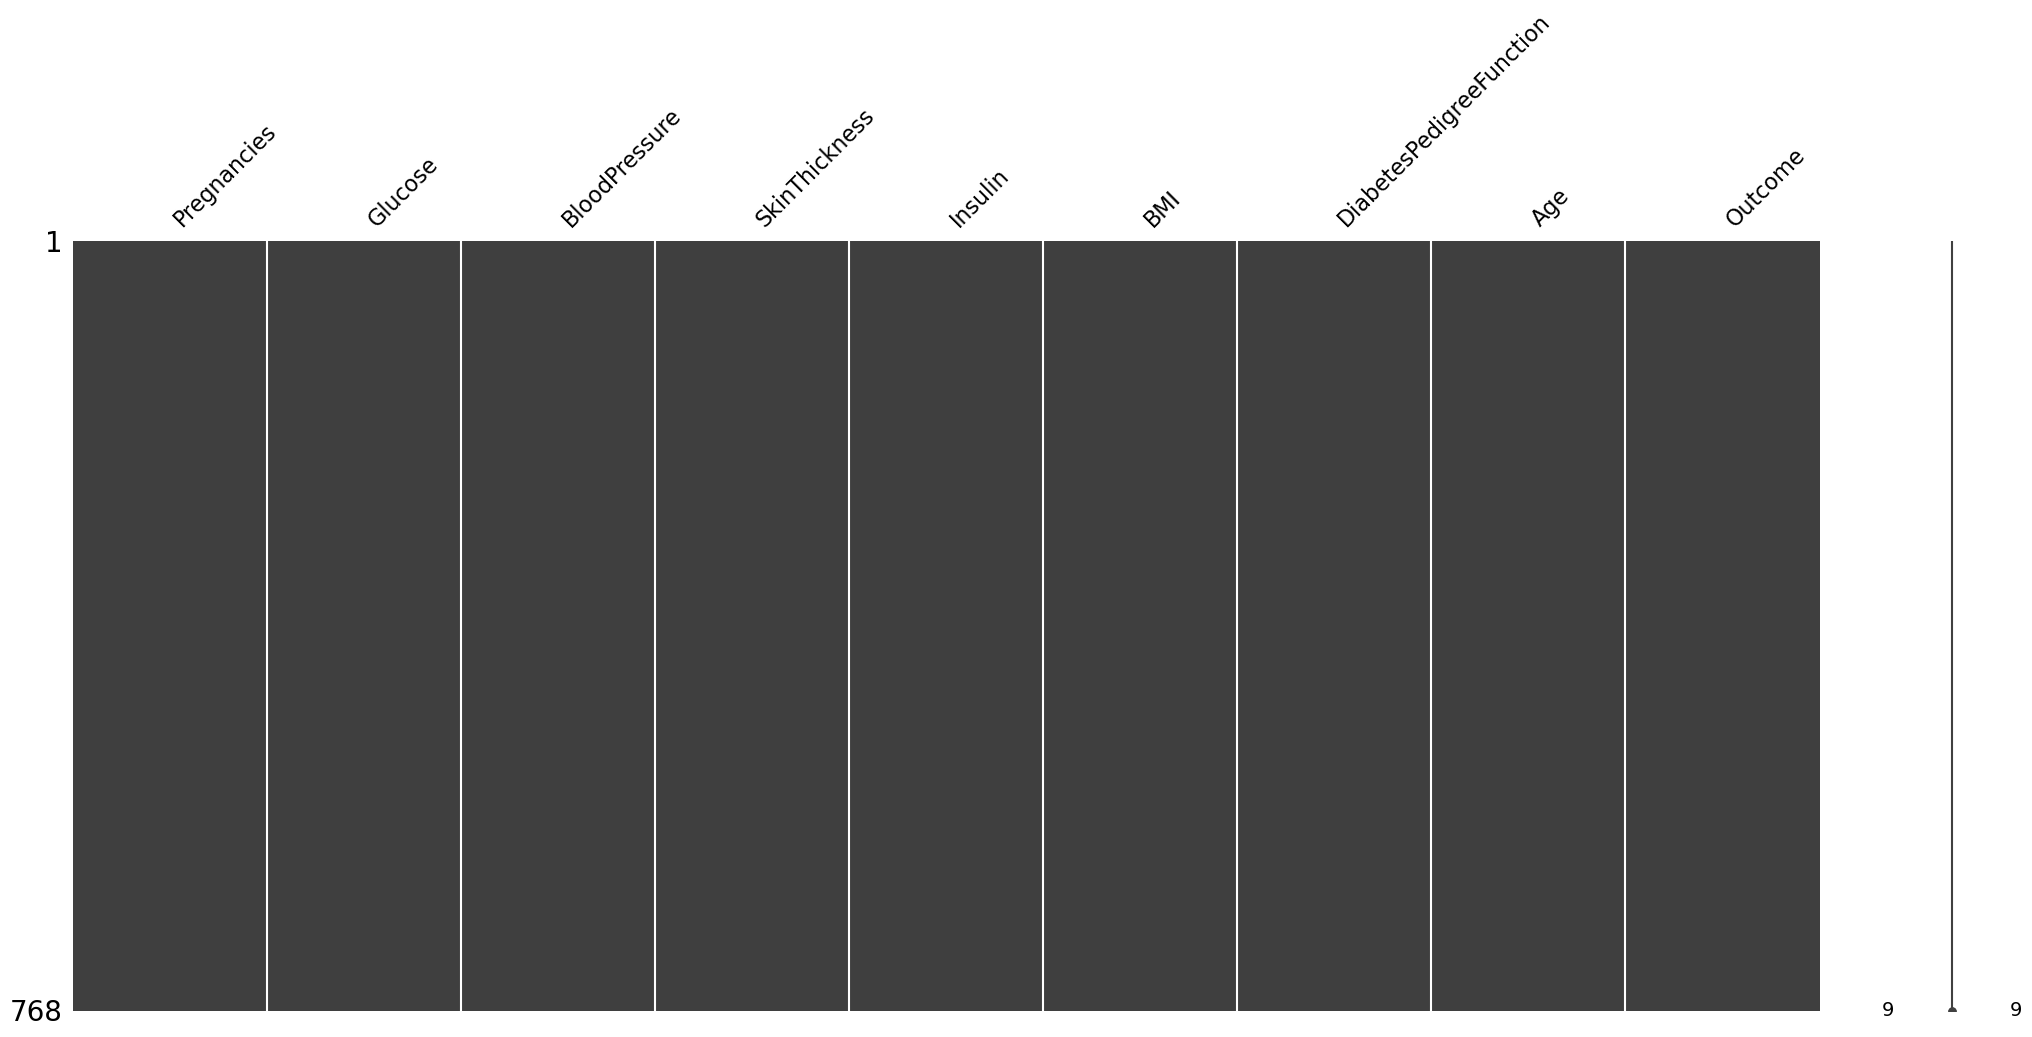

In [5]:
# plot the missingness matrix with missingno

# importing missingno packgage
import missingno as msno
# ploting missingness matrix with missingno
msno.matrix(cleaned_data)

In [ ]:
#install pandas profiling

%pip install ydata-profiling

In [6]:
# export an html report for your profiling

# Importing profie_report from ydata_profiling
from ydata_profiling import profile_report
# create an EDA report using pandas profiling
profile = cleaned_data.profile_report()
profile.to_file(output_file="eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# install seaborn and plot at least 2-3 variables of your choice
# after plotting explain what the plot is communicating.

In [7]:
# Install Seaborb
#%pip install seaborn
# Import Seaborn
import seaborn as sns

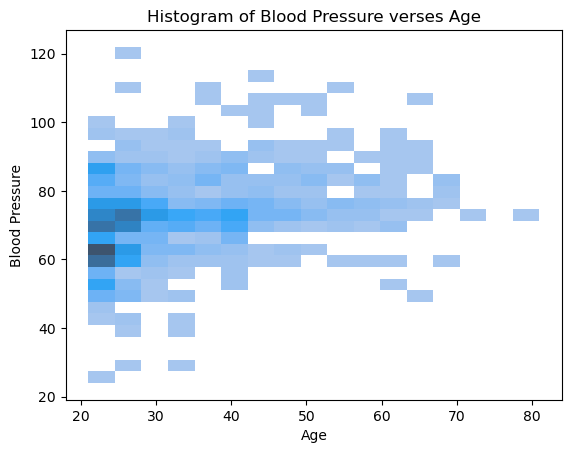

In [6]:
# Create histograms for Blood Pressure Vs Age
sns.histplot(data=cleaned_data, x="Age", y="BloodPressure", kde=True)
plt.title("Histogram of Blood Pressure verses Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.show()

The y-axis represents the range of Blood Pressure values, and the x-axis represents the Age of individuals  of the poupltion falling within each Blood Pressure range. From the histogram, we can observe that most of the individuals have blood pressure ranging from approximately 60 to 85 with the peak of 70

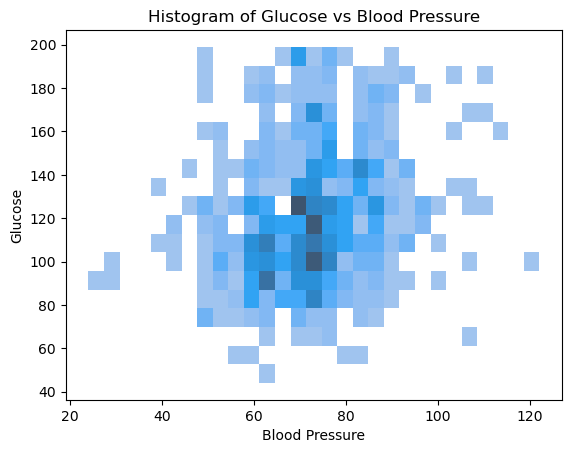

In [9]:
# Create histograms for BloodPressure vs Glucose
sns.histplot(data=cleaned_data, x="BloodPressure",y="Glucose", kde=True)
plt.title("Histogram of Glucose vs Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Glucose")
plt.show()

We can observe that when glucose level is approximately 120, the blood pressure is around 70 which is normal and this reflects the majority of the individuals in the population.

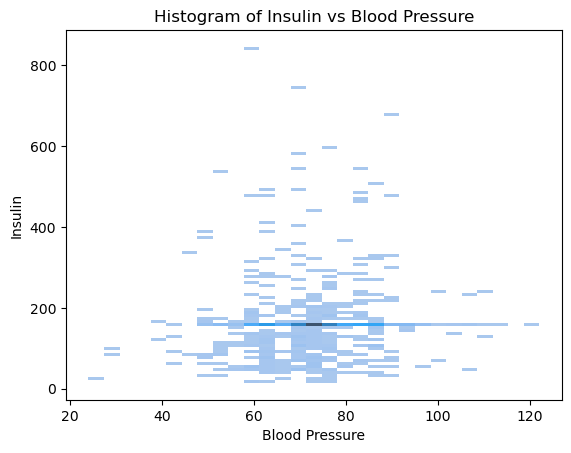

In [8]:
# Create histograms for Blood Pressure vs Insulin
sns.histplot(data=cleaned_data, x="BloodPressure",y="Insulin", kde=True)
plt.title("Histogram of Insulin vs Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Insulin")
plt.show()

We can observe that for most individuals with Blood Pressure between 70 to 80, have insulin level between 200 to 50. 